In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma2reverse import get_data,Strategy
# plt.style.use('seaborn')

In [4]:
df_dict = {}
candidate = ['ETH','BTC','BNB','SOL','MATIC',
            'XRP','DYDX','AVAX','LINK','GAS',
            'DOGE','ORDI','TRB','WLD','ADA',
            'OP','FIL','ZRX','LTC','RUNE','ATOM',
            'ARB','GMT','ETC','ARK','BCH','DOT',
            'LDO','SUI','GALA','CAKE',
            'APE','INJ','FTM','APT','YFI','OMG',
            'SEI','EOS','1000SHIB','NEAR',
            'MKR','CYBER','UNI','BLUR','SUSHI','WAVES','MASK','MANA',
            'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    pair = coin + 'USDT'
    df_dict[coin] = df = pd.read_hdf(f'Y:\\price_data\\binance\\1m\\{pair}_PERPETUAL.h5')

In [5]:
data = pd.read_csv('/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/ma2reverse/5min/BTC/both_record_df.csv')

{'long_ma': 182, 'short_ma': 36, 'hour': 3}
APY: 32.33 %
MDD: 9.22 %
MDD Duration 106 days 03:40:00
worst trade: -5.06 %
2022-06-05 12:25:00 ~ 2022-06-06 03:45:00
avg holding days: 0.65 days
--------------------------------------------
PF: 1.83
Sharpe Ratio: 1.50
Calmar Ratio: 3.10
Sortino Ratio: 2.15
Omega Ratio: 1.03
--------------------------------------------
Expectancy : 0.21 %
Total Time Exposure : 27.22 %
Total Trades: 295
Win Rate: 62.03 %
--------------------------------------------
PF * Win Rate: 1.134


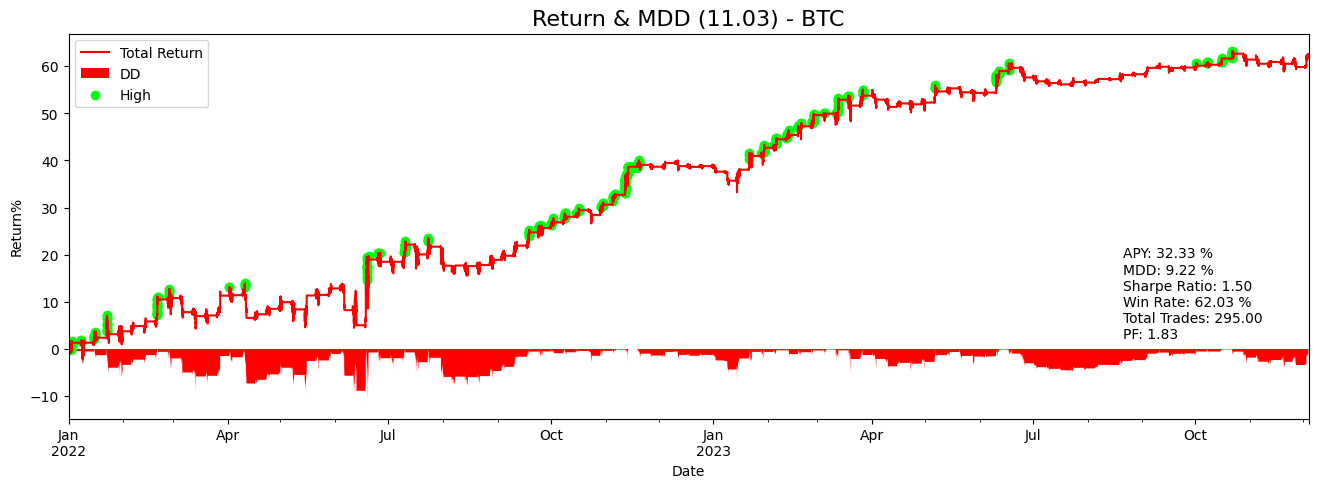

In [8]:
start = '2022-01-01'
sep = ''
end = ''

params = eval(data['params'].iloc[i])
print(params)
                
side = 'both'
config = {'freq':'5min', 'lag':1, 'fee': 0.0003, 'weekend_filter':False}
coin = 'BTC'

df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
value = analyze.show_pf_analysis(params, side, coin, axv_index='')

======================= BTC BOTH Optimize Test =======================
Optimization trails: 2736


  0%|          | 0/2736 [00:00<?, ?it/s]/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/.pyenv/versions/3.10.13/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pleas

Optimization time: 179.66 sec
---------- BTC BOTH ----------
{'long_ma': 170, 'short_ma': 44, 'hour': 3}
APY: 46.24 %
MDD: 8.33 %
MDD Duration 77 days 09:20:00
worst trade: -5.06 %
2022-06-05 12:25:00 ~ 2022-06-06 03:45:00
avg holding days: 0.63 days
--------------------------------------------
PF: 2.27
Sharpe Ratio: 1.99
Calmar Ratio: 5.20
Sortino Ratio: 2.84
Omega Ratio: 1.04
--------------------------------------------
Expectancy : 0.32 %
Total Time Exposure : 25.30 %
Total Trades: 194
Win Rate: 64.95 %
--------------------------------------------
PF * Win Rate: 1.476


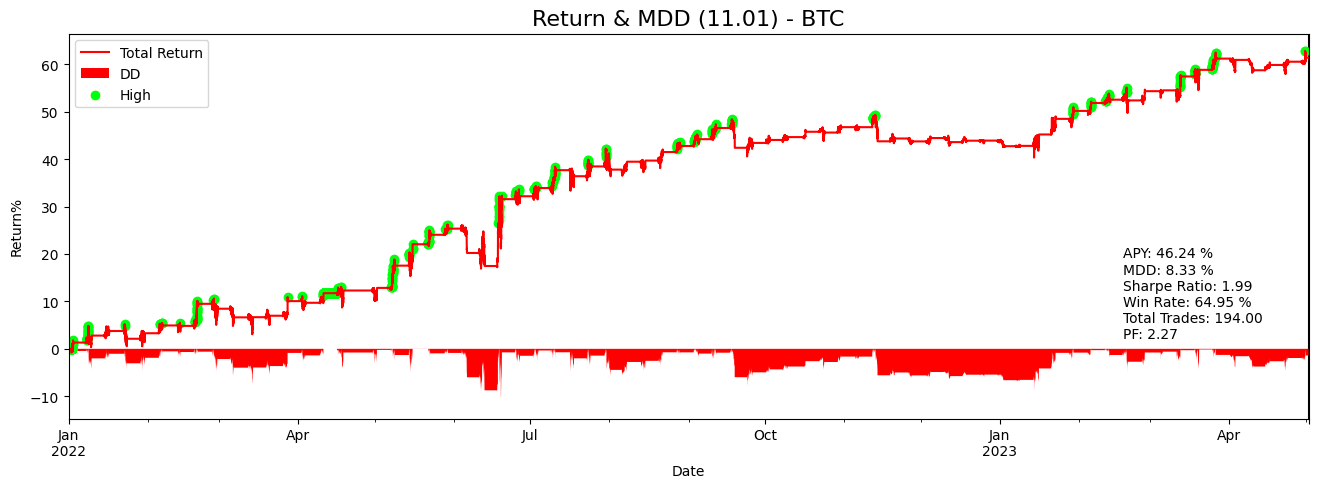

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     10.07 | 1647.71 |  -640.96 |       2.57 |   67.65 |         34 |
| 2022-06    |     22.13 | 3693.54 | -1481.01 |       2.49 |   68.75 |         32 |
| 2022-09    |     11.25 | 2175.97 | -1050.78 |       2.07 |   77.78 |         36 |
| 2022-12    |      0.42 |  926.32 |  -884.77 |       1.05 |   59.52 |         42 |
| 2023-03    |     17.37 | 2167.77 |  -430.77 |       5.03 |   59.38 |         32 |
| 2023-06    |      0.21 |  357.47 |  -336.92 |       1.06 |   50    |         18 |
+------------+-----------+---------+----------+------------+---------+------------+


In [4]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['BTC']
sample_sets = [[start,end]]
freq = '5min'

params = {"long_ma":[50,200,4],
          "short_ma":[4,100,4],
          "hour":[2,5,1]}

config = {'freq':freq,'fee': 0.0003,'weekend_filter': False}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    df_dict=df_dict,
    end=end,
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
